___
# GradientBoostingRegressor


reference:
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
- https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae
___

## Import Libraries

In [1]:
# Import DS environment
import sys; import os; sys.path.append(os.path.expanduser('~/Google Drive/my/projects/python/'))
from ds_setup import *
import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload

## Data

Setting up test data to look at

In [2]:
a = T(np.random.normal(0, size=(1000,1)), columns=["values"])
a['label'] = 1
b = T(np.random.normal(5, size=(1000,1)), columns=["values"])
b['label'] = 0

data = pd.concat([a, b])

X = data.drop(columns="label")
y = T(data).select("label")
display(X.head(), y.head())

,values
0,0.773375
1,-0.068029
2,0.567884
3,0.791575
4,-0.705320


,label
0,1
1,1
2,1
3,1
4,1


## EDA

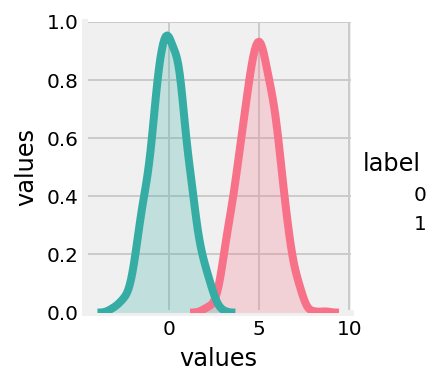

In [3]:
sns.pairplot(data,hue="label",palette="husl")

## Split Train & Test 

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y 
                                                    , test_size=0.30 
                                                    , random_state=101)

In [6]:
# try with and without

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [7]:
#X_train

## Training

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

In [9]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=5, learning_rate=1.0)
model.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Evaluation

In [10]:
#One of the benefits of growing trees is that we can understand how important each of the features are print "Feature Importances" 

coeff_df = pd.DataFrame(model.feature_importances_ ,X.columns,columns=['Coefficient'])
T(coeff_df).sort("Coefficient", ascending=False)

,Coefficient
values,1.0


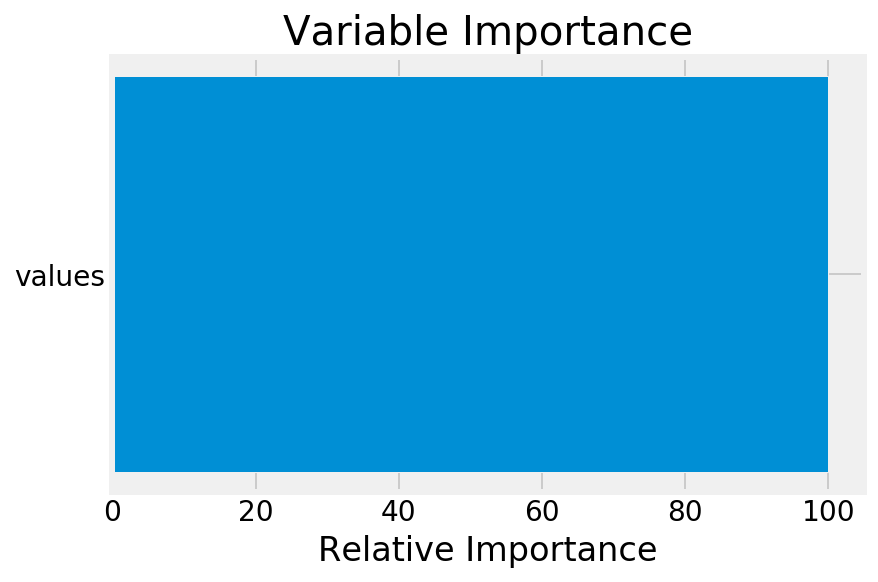

In [11]:
# #############################################################################
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
#plt.subplot(1, 2, 2)
plt.rcParams['font.size'] = 14
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [12]:
predictions = model.predict(X_test)

In [13]:
import copy 
predictions_original = copy.deepcopy(predictions)

#convert into binary values
for i in range(0,predictions.size):
    if predictions[i]>=.5:       # setting threshold to .5
       predictions[i]=1
    else:  
       predictions[i]=0
predictions

array([0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1.

In [14]:
y_test.head(n=3)

,label
1458,0
198,1
1276,0


In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confm = confusion_matrix(y_test, predictions)
confm

array([[310,   1],
       [  2, 287]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

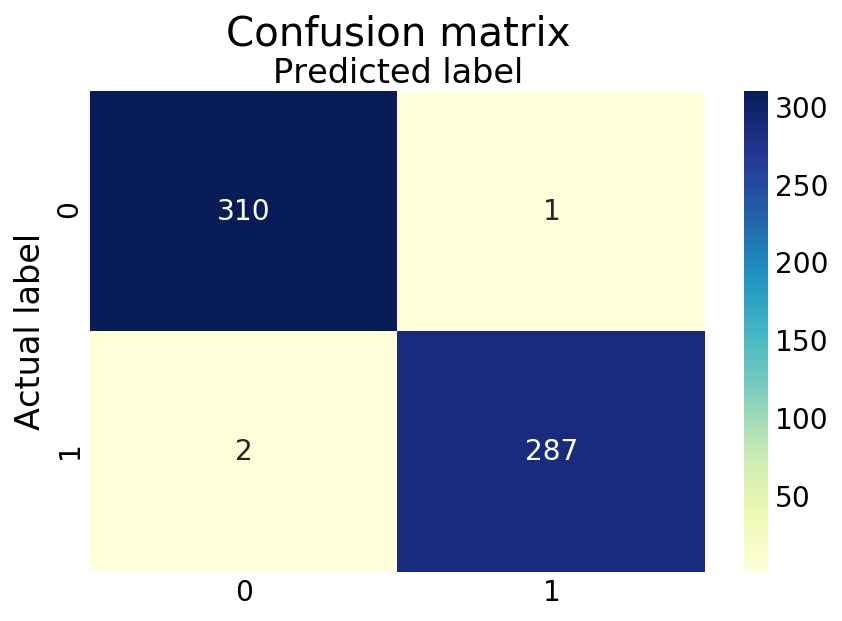

In [16]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,predictions, digits=3))

              precision    recall  f1-score   support

           0      0.994     0.997     0.995       311
           1      0.997     0.993     0.995       289

    accuracy                          0.995       600
   macro avg      0.995     0.995     0.995       600
weighted avg      0.995     0.995     0.995       600



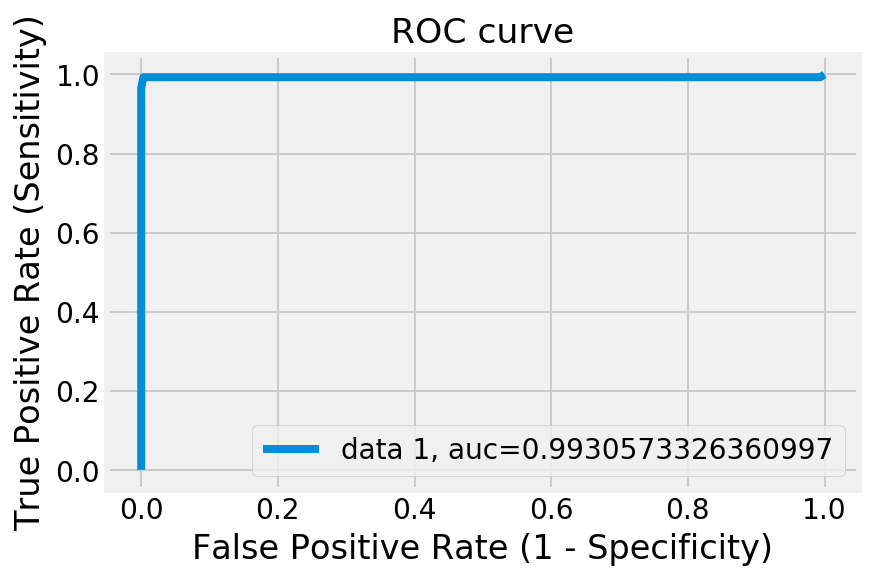

In [19]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions_original)
auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()
# reference: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

## Explainer

In [20]:
import eli5
from eli5.sklearn import PermutationImportance
# define a permutation importance object
perm = PermutationImportance(model).fit(X, y)
# show the importance
eli5.show_weights(perm, feature_names=X.columns.values)

Using TensorFlow backend.


Weight,Feature
1.9712 ± 0.0910,values


## Explainer Shap

In [21]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [22]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data)
print('Expected Value:', explainer.expected_value)
pd.DataFrame(shap_values).head()

Expected Value: [0.50785714]


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


,0,1
0,0.492143,0.0
1,0.492143,0.0
2,0.492143,0.0
3,0.492143,0.0
4,0.492143,0.0


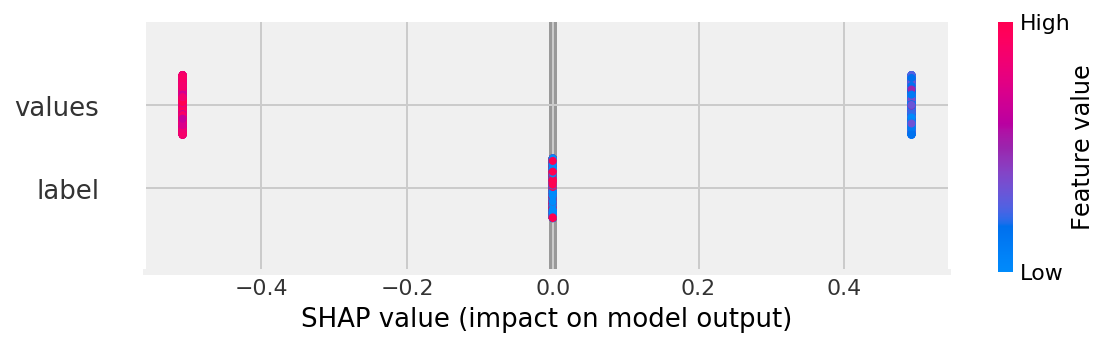

In [23]:
shap.summary_plot(shap_values, data)

In [24]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
i=3
shap.force_plot(explainer.expected_value, shap_values[i,:], data.iloc[i])

In [25]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, data)

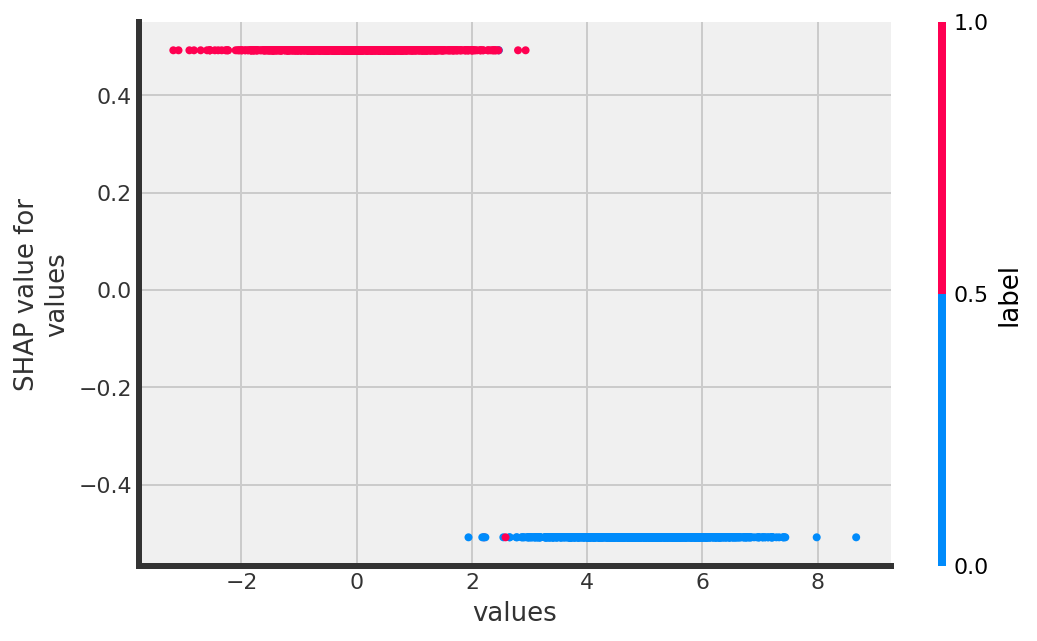

In [26]:
shap.dependence_plot("values", shap_values, data)